In [1]:
import subprocess
import os
os.chdir(subprocess.getoutput("git rev-parse --show-toplevel"))
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src import get_data, linear_model, preprocess, nn_model

Using TensorFlow backend.


In [3]:
term_dict = {
    'train': ['2011-01-01', '2014-12-31'],
    'valid': ['2015-01-01', '2015-12-31'],
    'test' : ['2016-01-01', '2016-12-31']
}

In [5]:
panel = get_data.symbols2daily_values()
features, labels, terms = preprocess.panel2get_batch(panel, term_dict)

# Linear Model(for compare)

* $\hat{c}_{t,i} = \sum_{k=1}^6 w_{k,i} c_{t-k, i}$

In [6]:
linear = linear_model.LinearModel(features, labels, terms)
linear.inference()

## accuracy
$a_{t,i} \leftarrow 1 \hspace{5mm} \text{if} \hspace{5mm}\hat{c}_{t.i} * c_{t,i} > 0$<br>
$\hspace{12mm} 0 \hspace{5mm} \text{otherwise}$ 
  
* histgram: $\left\{ E_t[a_{t,i}] \right\}_i$ distribution
* whole accuracy: $ E_{t,i}[a_{t,i}]$

whole accuracy is 0.492


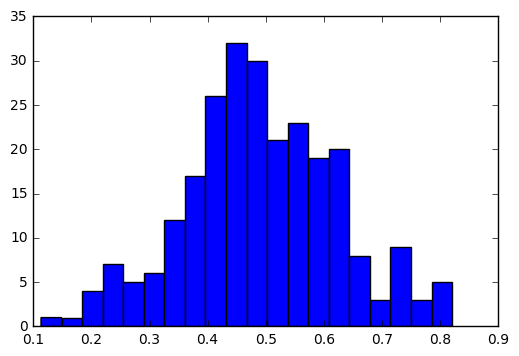

In [7]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
linear.plot_direction_accuracy()

## profit
* ${\large p_t \leftarrow p_{t-1} * E_i \left[\left(\frac{x_{t,i}}{x_{t-1,i}}\right)^{\operatorname{sgn}(\hat{c}_{t,i})}\right]}
\hspace{1cm} (p_0=1)$
* whole accuracy: ${\large \sqrt[\#\{t\}]{\prod_t p_t}}$

whole profit ration is 0.99972


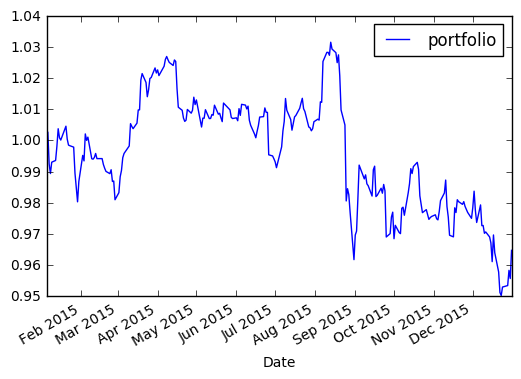

In [8]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
linear.plot_profit()